# Ethics in AI Final Team Project

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Direct URL from the UCI repository to fetch the dataset
data_url = '/content/diabetic_data.csv'

# Load the dataset manually using pandas
data = pd.read_csv(data_url, low_memory=False)

# Check the first few rows to ensure it is loaded correctly
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
# Check the column names
print(data.columns)

# Check the data types of the columns
print(data.dtypes)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
encounter_id                 int64
patient_nbr                  int64

per IDS Mapping File

In [ ]:
# Assuming you've loaded the descriptions for each ID as separate dataframes
admission_type_desc = pd.DataFrame({
    'admission_type_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'admission_description': ['Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available', 'NULL', 'Trauma Center', 'Not Mapped']
})

discharge_desc = pd.DataFrame({
    'discharge_disposition_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'discharge_description': ['Discharged to home', 'Discharged/transferred to another short term hospital', 'Discharged/transferred to SNF', 'Discharged/transferred to ICF', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to home with home health service', 'Left AMA', 'Discharged/transferred to home under care of Home IV provider', 'Admitted as an inpatient to this hospital', 'Neonate discharged to another hospital for neonatal aftercare', 'Expired', 'Still patient or expected to return for outpatient services']
})

admission_source_desc = pd.DataFrame({
    'admission_source_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'admission_source_description': ['Physician Referral', 'Clinic Referral', 'HMO Referral', 'Transfer from a hospital', 'Transfer from a Skilled Nursing Facility (SNF)', 'Transfer from another health care facility', 'Emergency Room', 'Court/Law Enforcement', 'Not Available']
})

# Merge the descriptions into the main dataset
data = data.merge(admission_type_desc, on='admission_type_id', how='left')
data = data.merge(discharge_desc, on='discharge_disposition_id', how='left')
data = data.merge(admission_source_desc, on='admission_source_id', how='left')

# Check the updated dataset
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... glipizide-metformin glimepiride-pioglitazone  \
0                 1  ...                  No                 

In [ ]:
# Check the distribution of age, gender, race, admission type, discharge disposition, and admission source
print(data['age'].value_counts())
print(data['gender'].value_counts())
print(data['race'].value_counts())
print(data['admission_description'].value_counts())
print(data['discharge_description'].value_counts())
print(data['admission_source_description'].value_counts())

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
admission_description
Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: count, dtype: int64
discharge_description
Discharged to home                                                      60234
Discharged/transferred to SNF                                           13954
Discharged/transferred to home with home health service                 12902
Discharged/tr

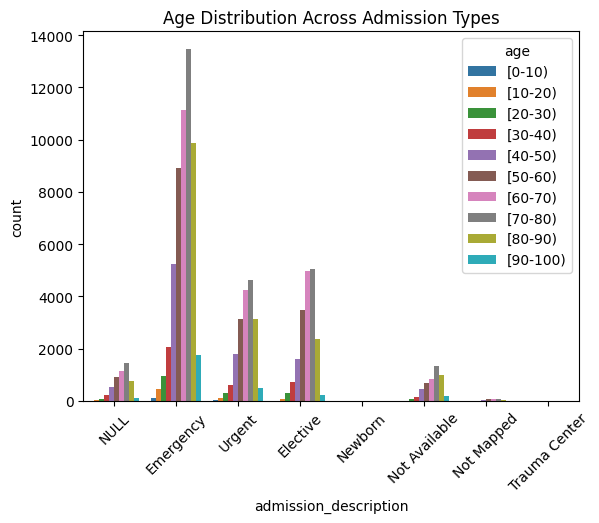

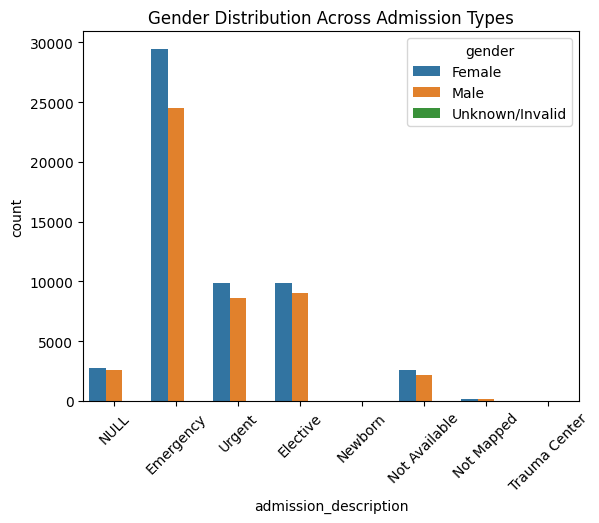

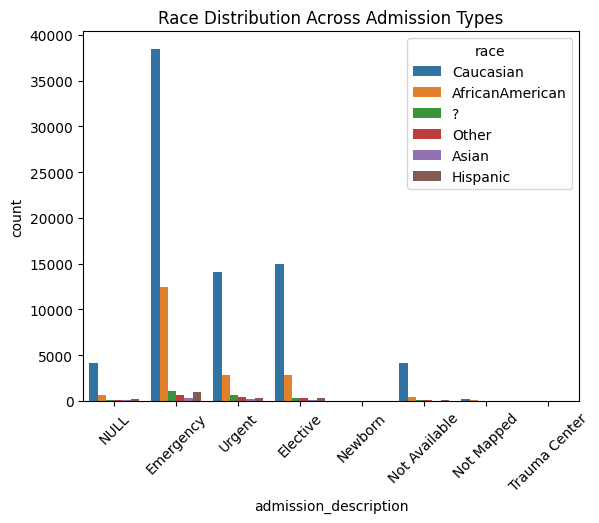

In [ ]:
# Visualize age distribution across admission types
sns.countplot(x='admission_description', hue='age', data=data)
plt.title('Age Distribution Across Admission Types')
plt.xticks(rotation=45)
plt.show()

# Visualize gender distribution across admission types
sns.countplot(x='admission_description', hue='gender', data=data)
plt.title('Gender Distribution Across Admission Types')
plt.xticks(rotation=45)
plt.show()

# Visualize race distribution across admission types
sns.countplot(x='admission_description', hue='race', data=data)
plt.title('Race Distribution Across Admission Types')
plt.xticks(rotation=45)
plt.show()

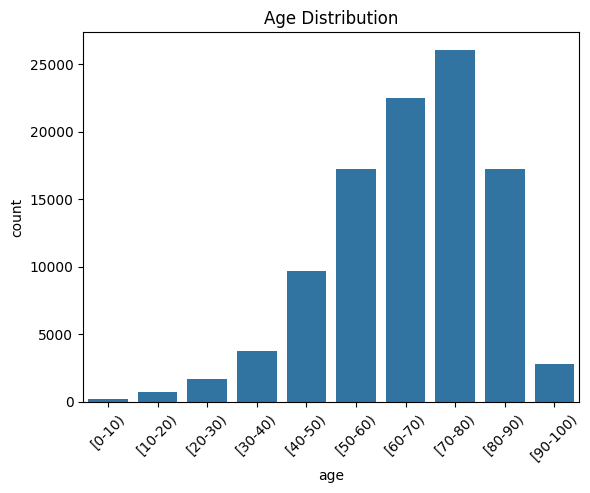

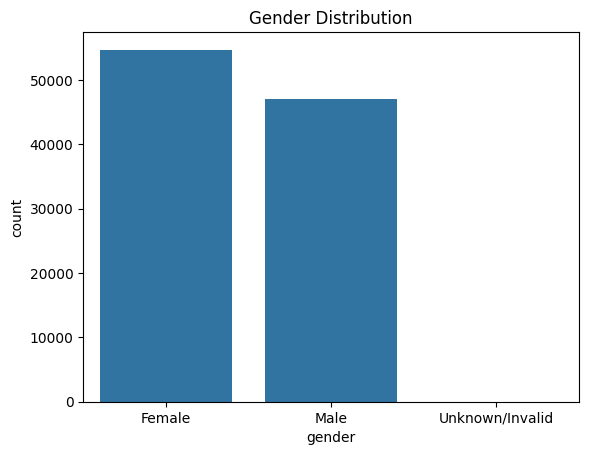

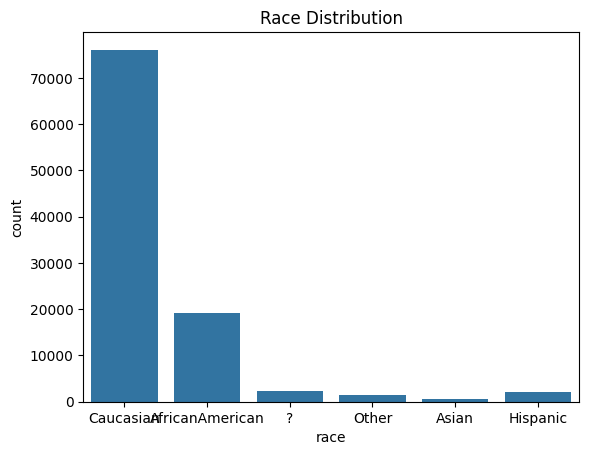

In [ ]:
sns.countplot(x='age', data=data)
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

# Visualizing the distribution of gender
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Visualizing the distribution of race
sns.countplot(x='race', data=data)
plt.title('Race Distribution')
plt.show()

In [ ]:
# Check for missing values in important columns
missing_values = data[['age', 'gender', 'race', 'admission_description', 'discharge_description', 'admission_source_description']].isnull().sum()
print(missing_values)

age                                0
gender                             0
race                               0
admission_description              0
discharge_description           8146
admission_source_description    6969
dtype: int64


### **Deep Dive into our Dataset and Ethical Considerations**

The dataset we have worked with is highly relevant to healthcare and diabetes management, offering key insights into patient demographics, hospital admissions, and discharge statuses. As you're analyzing this data, it's essential to critically examine how **biases** can emerge and how those biases can influence **AI models**, especially in the context of healthcare decision-making.

#### **1. Age Distribution: Understanding Representation and Bias**

##### **Current Insights:**
- The **age distribution** shows a marked skew towards **older age groups**, with **[70-80)** and **[60-70)** as the most frequent groups, which is expected in a diabetes-related dataset, as the disease primarily affects **older adults**.
- **Younger age groups** (e.g., **[0-10)** and **[10-20)**) are **underrepresented**, with the **[0-10)** group containing only 161 instances. This indicates that **children and young adults** are less likely to be diagnosed with diabetes, or that their cases are underreported in this dataset.

##### **Ethical Implications and Potential Biases:**
- **Bias in Age Representation**: A model trained on this dataset may be biased towards **older patients**, as the training data overwhelmingly represents them. For example, an AI model that predicts **readmission risk** might perform poorly for younger individuals because it hasn't been trained on enough data from these groups.
  - **Subtle Bias Impact**: Even if younger age groups are **underrepresented**, their relatively **small numbers** could still lead to performance issues if the model is used in real-world scenarios where **younger individuals** are diagnosed and treated for diabetes. If this bias isn't addressed, younger populations may not receive accurate predictions or care recommendations tailored to their unique needs.
  
##### **Suggestions for Improvement:**
- **Data Augmentation**: Consider **augmenting the dataset** with **synthetic data** for younger age groups or **using stratified sampling** during model training to ensure equal representation across all age groups. This ensures that the model can generalize well to all age ranges.
- **Inclusion of Pediatric Data**: If possible, include more data from pediatric patients with diabetes. Although this might require **sourcing data** from different hospitals or studies, it will help to balance the age distribution and make the model more inclusive.



#### **2. Gender Distribution: Fairness and Representation**

##### **Current Insights:**
- The **gender distribution** is relatively balanced, with **54,708 females** and **47,055 males**. However, there are only **3 instances** marked as **Unknown/Invalid**, which may indicate **data quality issues**.
  
##### **Ethical Implications and Potential Biases:**
- **Gender Bias**: While the **gender distribution** seems relatively even, the **small number of "Unknown/Invalid" gender entries** could introduce **bias** if not addressed. Even though this number is small, it is essential to ensure that all data points are handled appropriately, as this could affect **model predictions** related to gender-specific healthcare needs.
- **Impact on Healthcare**: In **healthcare**, gender is a **critical factor** that can affect how patients are diagnosed and treated. Bias in gender data could lead to **discriminatory healthcare predictions** or misdiagnoses.
  
##### **Suggestions for Improvement:**
- **Handle Unknown Gender Data**: Impute or remove the **"Unknown/Invalid"** gender entries. If the gender is **missing** due to data collection issues, this needs to be handled carefully to prevent **misclassification**.
- **Monitor Gender-Specific Health Disparities**: When training models, ensure that gender-specific **health disparities** (e.g., diabetes complications that are more common in one gender) are taken into account. You can do this by adding **gender-specific features** or **interactions** to the model, ensuring that both genders receive fair treatment in the prediction process.
  


#### **3. Race Distribution: The Power of Representation**

##### **Current Insights:**
- The **race distribution** is highly skewed, with **Caucasians** making up **76,099** entries, **African Americans** at **19,210**, and much smaller numbers for other races, such as **Hispanic (2,037)**, **Asian (641)**, and **Other (1,506)**.
- The **race column** has **2,273 missing values**, represented as `"?"`. This indicates that **missing race data** is a significant issue and could lead to **biased model predictions** if not handled correctly.

##### **Ethical Implications and Potential Biases:**
- **Underrepresentation of Minority Groups**: The significant overrepresentation of **Caucasian patients** could lead to a **biased AI model** that performs **better for Caucasian patients** than for **African American**, **Hispanic**, or **Asian** patients. This is especially critical in healthcare, where race plays a role in **health disparities** and **diabetes management**.
- **Impact on Healthcare**: If a model trained on this dataset is deployed in the real world, **minority groups** might receive subpar predictions or healthcare advice, exacerbating existing health disparities. The **"?"** entries in the race column should not be ignored, as they can introduce **systemic bias**.

##### **Suggestions for Improvement:**
- **Handle Missing Data**: Impute or remove rows where race data is missing. One approach is to **impute based on other known factors** (e.g., **age**, **gender**, or **admission type**) or use **data augmentation** to balance the dataset.
- **Stratified Sampling**: During training, use **stratified sampling** to ensure that minority groups are adequately represented in both the **training** and **testing** data sets. This will help ensure **fairness** in the model and prevent overfitting to the **Caucasian population**.
- **Bias Mitigation Algorithms**: Consider using **bias mitigation techniques** such as **adversarial debiasing** or **re-weighting** during model training to reduce the impact of race-based imbalances on model predictions.



#### **4. Admission Type Distribution: Predictive Bias in Emergency Cases**

##### **Current Insights:**
- **Emergency admissions** are the most common (53,990), followed by **Elective** (18,869) and **Urgent** (18,480), with **NULL** and **Not Available** categories making up 5,291 and 4,785 cases, respectively.
- **NULL** or **Not Available** admissions may indicate **missing data**, potentially introducing uncertainty into model predictions.

##### **Ethical Implications and Potential Biases:**
- **Bias in Emergency Admissions**: Given the dominance of **emergency admissions** in the dataset, models trained on this data may focus too heavily on **emergency care** scenarios and fail to generalize well to **elective** or **urgent** cases.
  - If **emergency room care** is treated as the "default," this could lead to **unfair predictions** for patients who have elective procedures, potentially leading to missed opportunities for preventative care or mispredicted readmissions.

##### **Suggestions for Improvement:**
- **Balance Emergency vs. Non-Emergency Data**: **Stratified sampling** or **oversampling** of the **elective** and **urgent** admissions could help ensure the model handles all types of admissions equally well.
- **Address Missing Data**: For **NULL** or **Not Available** categories, decide whether to **impute** (e.g., using the most frequent admission type) or **remove** them, depending on their prevalence and importance to the analysis.



#### **5. Discharge Description and Admission Source: Fine-tuning for Equity**

##### **Current Insights:**
- **Discharge**: The most common discharge type is **"Discharged to home"**, followed by **"Discharged/transferred to SNF"** and **"home health service"**. Rare categories such as **"Admitted as an inpatient"** have very few cases.
- **Admission Source**: The dominant source of admission is **"Emergency Room"**, followed by **Physician Referral**.

##### **Ethical Implications and Potential Biases:**
- **Discharge Bias**: Certain **discharge types** may be associated with specific patient groups (e.g., **home health services** may disproportionately affect certain **age groups** or **races**). A model trained on this data could inadvertently **disadvantage** patients from specific discharge categories.
- **Admission Source Bias**: Given the high frequency of **Emergency Room** admissions, the model could potentially **overfit** to this group, missing predictions for patients who come through other sources like **Physician Referral** or **Clinic Referrals**.

##### **Suggestions for Improvement:**
- **Evaluate Discharge Outcomes by Demographic**: it is to be ensured that the **discharge description** data is **fairly represented** across **age**, **gender**, and **race**. This will help ensure that the model predicts **readmissions** and **discharges** equitably.
- **Bias Detection Tools**: Implement **fairness auditing tools** to detect if any groups are disproportionately impacted by the model’s predictions, especially in terms of **discharge status** and **admission source**.



### **Final Thoughts: Representation and Fairness in AI Healthcare Models**

In healthcare, **data representation** is crucial, as underrepresentation or overrepresentation of certain groups can lead to **biased outcomes**. Even small imbalances in the data, such as **age**, **gender**, or **race**, can significantly impact the predictions and fairness of the model. Here are some key takeaways:

1. **Small Changes Have Big Impacts**: Even a small underrepresentation of a group (e.g., younger patients, minority races) can cause **discriminatory outcomes**. If these biases are not addressed, it can lead to a **failure to generalize** to the **real-world population** and exacerbate health disparities.
   
2. **Continuous Monitoring**: It is crucial to continually **monitor the performance** of the model across all demographic groups. Regular fairness assessments ensure that no particular group is unfairly disadvantaged.

3. **Bias Mitigation**: Consider using **bias mitigation techniques** (like **reweighting** or **fairness constraints**) and **diverse sampling methods** (like **stratified sampling**) to address bias issues.

By recognizing the importance of **representing diverse patient populations** and actively working to address **imbalances** in the data, we can ensure that AI models in healthcare are **fair**, **inclusive**, and **ethical**.


In [ ]:
!pip install fairlearn

In [ ]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

In [ ]:
print(data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_description', 'discharge_description',
       'admission_source_descriptio

In [ ]:
# Check the distribution of 'A1Cresult' or 'max_glu_serum'
print(data['A1Cresult'].value_counts())  # Replace with 'max_glu_serum' if you prefer that column

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64


In [ ]:
# Check for missing values in the target variable
print(data['A1Cresult_encoded'].isnull().sum())

84748


In [ ]:
# Encode A1Cresult categories to numeric values
data['A1Cresult_encoded'] = data['A1Cresult'].map({'>8': 2, 'Norm': 0, '>7': 1})

# Check the encoded values
print(data['A1Cresult_encoded'].value_counts())

A1Cresult_encoded
2.0    8216
0.0    4990
1.0    3812
Name: count, dtype: int64


In [ ]:
pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
# Encode 'race' column to numeric values
data['race_encoded'] = data['race'].map({
    'Caucasian': 1,
    'AfricanAmerican': 0,
    'Hispanic': 2,
    'Asian': 3,
    'Other': 4,
    '?': 5  # Handle missing or unknown race as a separate category
})

# Verify the encoding
print(data['race_encoded'].value_counts())

race_encoded
1    76099
0    19210
5     2273
2     2037
4     1506
3      641
Name: count, dtype: int64


In [ ]:
# Drop rows with any missing values in the dataset
data_cleaned = data.dropna()

In [ ]:
# Impute missing values in categorical columns with the mode (most frequent value)
data['race'].fillna(data['race'].mode()[0], inplace=True)

<ipython-input-82-106e0153b40e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['race'].fillna(data['race'].mode()[0], inplace=True)


In [ ]:
# Define a function to map age ranges to numeric values (midpoint)
def age_range_to_numeric(age_range):
    # Extract the numeric values from the range (e.g., [0-10) -> 0 and 10)
    start, end = map(int, age_range.strip('[]()').split('-'))
    # Return the midpoint of the range
    return (start + end) / 2

# Apply the function to the 'age' column to convert it to numeric
data['age_numeric'] = data['age'].apply(age_range_to_numeric)

# Check the new column
print(data[['age', 'age_numeric']].head())

       age  age_numeric
0   [0-10)          5.0
1  [10-20)         15.0
2  [20-30)         25.0
3  [30-40)         35.0
4  [40-50)         45.0


In [ ]:
# Impute missing values in the 'age_numeric' column with the mean
data['age_numeric'].fillna(data['age_numeric'].mean(), inplace=True)

<ipython-input-88-150bb062329b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age_numeric'].fillna(data['age_numeric'].mean(), inplace=True)


In [ ]:
# Features (drop non-numeric and non-predictive columns)
X = data.drop(columns=['A1Cresult', 'A1Cresult_encoded', 'patient_nbr', 'encounter_id'])

# Convert categorical features to numeric (if necessary)
X = pd.get_dummies(X)

# Target variable (encoded A1Cresult)
y = data['A1Cresult_encoded']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check the model's accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Make predictions on the entire dataset (not just the test set)
data['predicted'] = model.predict(X)  # Use X for the entire feature set

# Check the first few rows to confirm the predictions were added
print(data[['predicted', 'A1Cresult_encoded']].head())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9131865972290459
   predicted  A1Cresult_encoded
0        2.0                2.0
1        2.0                2.0
2        2.0                2.0
3        2.0                2.0
4        2.0                2.0


### **Analysis: Impact of Bias on Model Predictions**

The model we've trained for predicting **`A1Cresult_encoded`** has achieved **high accuracy (91.32%)**, but it's **consistently predicting the same class (2.0)**. This suggests that **bias** in our model is preventing it from effectively distinguishing between classes, despite achieving good accuracy.

### **Potential Reasons for Bias:**

1. **Class Imbalance**:
   - The dataset might be **imbalanced**, with one class dominating the predictions. The model likely defaults to predicting the **majority class**, which leads to high accuracy but poor performance for the minority classes.

2. **Performance Metrics**:
   - **Accuracy** alone is misleading, as the model is likely predicting the **majority class** for all instances. This masks poor performance for underrepresented classes, highlighting the need to evaluate **recall**, **precision**, and **F1 score** to assess the model's fairness.

3. **Data Preprocessing Issues**:
   - If the **features** were not scaled or **categorical variables** (e.g., **race**, **gender**) were improperly encoded, the model might fail to learn meaningful patterns and exhibit bias toward the majority class.

4. **Model Training Bias**:
   - If the training data is **biased** (e.g., overrepresentation of certain classes or groups), the model may learn to favor the overrepresented groups, leading to poor generalization for minority classes.

5. **Bias in Predictions for Demographic Groups**:
   - The model could be treating certain groups unfairly based on **race**, **gender**, or **age**, leading to disparate predictions across these groups.

### **Suggestions for Addressing Bias**:

1. **Resample the Data**:
   - **Oversample** the minority classes or **undersample** the majority class to ensure the model learns equally from all groups.
   
2. **Class Weighting**:
   - Apply **class weights** to penalize the model for misclassifying minority classes and improve its sensitivity to them.

3. **Use Fairness-Aware Models**:
   - Implement **fairness constraints** during training or use **fairness-aware algorithms** to reduce bias.

4. **Feature Engineering**:
   - Ensure that features are properly **encoded** and **scaled** for better model performance and convergence.

5. **Monitor Performance Across Demographics**:
   - Continuously evaluate the model’s performance across different **age**, **gender**, and **race** groups to ensure **fairness**.

By addressing these biases, we can improve the model's ability to make fair and accurate predictions for all groups, leading to more equitable healthcare outcomes.